# Retail Sales Analysis

## 1. Project Overview

This project involves a comprehensive analysis of retail sales data to uncover trends, seasonal patterns, and factors influencing sales performance. By leveraging transactional and inventory data, the analysis aims to provide actionable insights for optimizing sales strategies and improving inventory management.


## 2. Imports

In [116]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

## 3. Data Loading

In [117]:
sales = pd.read_csv('./datasets/Amazon Sale Report.csv')
sales.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_11768\3939810798.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  sales = pd.read_csv('./datasets/Amazon Sale Report.csv')


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [118]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

### Conversion of datatypes

In [119]:
sales['Date'] = pd.to_datetime(sales['Date'])
sales['ship-postal-code'] = sales['ship-postal-code'].astype(object)
sales.drop(columns='Unnamed: 22', inplace=True)
sales.info()

C:\Users\USER\AppData\Local\Temp\ipykernel_11768\140846542.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales['Date'] = pd.to_datetime(sales['Date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index               128975 non-null  int64         
 1   Order ID            128975 non-null  object        
 2   Date                128975 non-null  datetime64[ns]
 3   Status              128975 non-null  object        
 4   Fulfilment          128975 non-null  object        
 5   Sales Channel       128975 non-null  object        
 6   ship-service-level  128975 non-null  object        
 7   Style               128975 non-null  object        
 8   SKU                 128975 non-null  object        
 9   Category            128975 non-null  object        
 10  Size                128975 non-null  object        
 11  ASIN                128975 non-null  object        
 12  Courier Status      122103 non-null  object        
 13  Qty                 128975 no

## 4. Data Cleaning

### Zero Quantity

ALERT!!!!

There is an issue observed! There are entries with zero quantities!

In [120]:
sales.groupby('Qty').size()/sales.shape[0]

Qty
0     0.099298
1     0.897693
2     0.002644
3     0.000248
4     0.000070
5     0.000016
8     0.000008
9     0.000008
13    0.000008
15    0.000008
dtype: float64

...and then those with zero amounts too

In [121]:
sales.groupby('Amount').size()/sales.shape[0]

Amount
0.00       0.018166
199.00     0.000023
218.10     0.000008
229.00     0.000163
236.19     0.000016
             ...   
2894.00    0.000008
3036.00    0.000008
4235.72    0.000008
5495.00    0.000008
5584.00    0.000008
Length: 1410, dtype: float64

The **zero quantity** and **amounts** entries comprise about 10% of the current dataset. It could be:
- Canceled Orders
- Free Samples
- Entry Errors
- Returns and Refunds
- Incomplete Transactions


However, considering the goal is to analyse successful sales, we will be dropping the rows

In [122]:
# Drop rows where 'Qty' and 'Amount is zero
sales = sales[sales['Qty'] != 0]
sales = sales[sales['Amount'] != 0]

# Verify the changes
print(sales['Qty'].value_counts())
print(sales['Amount'].value_counts().sort_values().head(3))

Qty
1     113437
2        341
3         32
4          9
5          2
15         1
9          1
13         1
8          1
Name: count, dtype: int64
Amount
639.0     1
1498.0    1
1384.0    1
Name: count, dtype: int64


In [123]:
sales.isna().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status            0
Qty                       0
currency                124
Amount                  124
ship-city                28
ship-state               28
ship-postal-code         28
ship-country             28
promotion-ids         35124
B2B                       0
fulfilled-by          82236
dtype: int64

SOrting out the zero quantities also cleared the missing values for the courier services

### Handling missing values

In [124]:
# Creating a series of percentage of missing values per column
missing_values = sales.isna().mean()*100

# View only columns with missing values
missing_values[missing_values > 0]

currency             0.108939
Amount               0.108939
ship-city            0.024599
ship-state           0.024599
ship-postal-code     0.024599
ship-country         0.024599
promotion-ids       30.857896
fulfilled-by        72.247749
dtype: float64

#### Fulfilled-by column

The **fulfilled-by** column has more than 50% of its entries missing. We will inspect the nature of its values first.

In [125]:
# Check the entries in the fulfiled-by column
print('Fulfilled-by column values:', sales['fulfilled-by'].unique())

Fulfilled-by column values: ['Easy Ship' nan]


Since it contains only one value we can let go of the fulfilled-by column with ease

In [126]:
sales.drop(columns = 'fulfilled-by', axis = 1, inplace = True)

missing_values = sales.isna().mean()*100
missing_values[missing_values > 0]

currency             0.108939
Amount               0.108939
ship-city            0.024599
ship-state           0.024599
ship-postal-code     0.024599
ship-country         0.024599
promotion-ids       30.857896
dtype: float64

#### Currency and Amount columns

In [127]:
# Check the entries in the fulfiled-by column
print('Currency column values:', sales['currency'].unique())

Currency column values: ['INR' nan]


It is possible that since the amount of missing values of **Currency** and **Amount** columns are equal they might be null at the same place.

In [128]:
# Checking possibility of similar positions of null values
sales[sales['currency'].isna()][['currency', 'Amount']]

,currency,Amount
937,NaN,NaN
1057,NaN,NaN
3631,NaN,NaN
3632,NaN,NaN
3634,NaN,NaN
...,...,...
118099,NaN,NaN
124616,NaN,NaN
124617,NaN,NaN
124619,NaN,NaN


Since we have confirmed this, we can drop those rows

In [129]:
# Drop all columns with missing values for the currency and the amount
sales.dropna(subset=['currency', 'Amount'], inplace=True)
sales.isna().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status            0
Qty                       0
currency                  0
Amount                    0
ship-city                28
ship-state               28
ship-postal-code         28
ship-country             28
promotion-ids         35000
B2B                       0
dtype: int64

#### Ship city, state, postal-code, and country

We will employ the same tactic as with currency and amount columns

In [130]:
# Checking possibility of similar positions of null values
sales[sales['ship-city'].isna()][['ship-city', 'ship-state', 'ship-postal-code', 'ship-country']].head()

,ship-city,ship-state,ship-postal-code,ship-country
1871,NaN,NaN,NaN,NaN
1872,NaN,NaN,NaN,NaN
8752,NaN,NaN,NaN,NaN
11215,NaN,NaN,NaN,NaN
15688,NaN,NaN,NaN,NaN


Since we are in a similar situation with these columns, we will also drop the rows affected

In [131]:
# Drop all rows with missing values for the shipping locations
sales.dropna(subset=['ship-city', 'ship-state', 'ship-postal-code', 'ship-country'], inplace=True)
sales.isna().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status            0
Qty                       0
currency                  0
Amount                    0
ship-city                 0
ship-state                0
ship-postal-code          0
ship-country              0
promotion-ids         34996
B2B                       0
dtype: int64

#### Promotion IDs

In [132]:
# Creating a series of percentage of missing values per column
missing_values = sales.isna().mean()*100

# View only columns with missing values
missing_values[missing_values > 0]

promotion-ids    30.786554
dtype: float64

Since a large portion of this column is missing, we will fill in a placeholder "No Promotion"

In [133]:
sales['promotion-ids'] = sales['promotion-ids'].fillna('No Promotion')

## 5. Exploratory Data Analysis

### Descriptive Statistics and Summary

In [134]:
# Summary statistics
print(sales['Amount'].describe())

count    113673.000000
mean        663.173973
std         269.545993
min         199.000000
25%         459.000000
50%         625.000000
75%         788.000000
max        5584.000000
Name: Amount, dtype: float64


In [135]:
# Group by category or any other relevant feature
print(sales.groupby('Category')['Amount'].sum().sort_values())

Category
Dupatta               915.0
Saree              118509.0
Bottom             140226.0
Blouse             434751.0
Ethnic Dress       760711.0
Top               5202753.0
Western Dress    10628361.0
kurta            20445273.0
Set              37653476.0
Name: Amount, dtype: float64


From the table above we can deduce that the **Set** category has the most sales and the **Dupatta** is the category with the least patrons

### Univariate Analysis

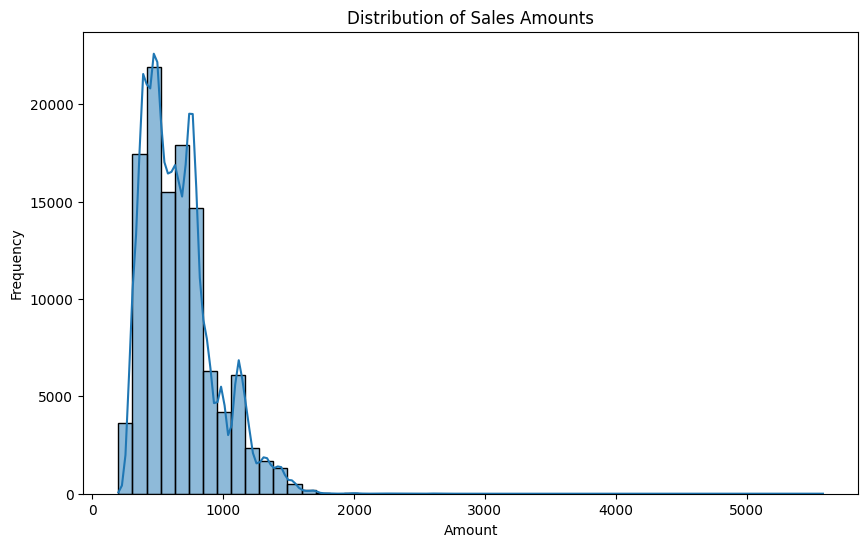

In [136]:
# Distribution of sales amounts
plt.figure(figsize=(10, 6))
sns.histplot(sales['Amount'], bins=50, kde=True)
plt.title('Distribution of Sales Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

Most customers put in for less than 1000 units per order with 90% below 2000 units per order.

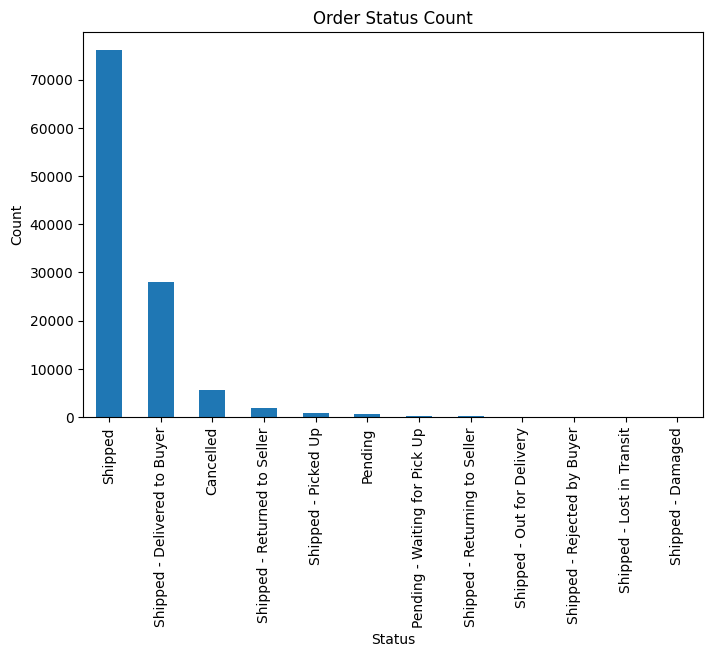

In [137]:
# Count of orders by status
plt.figure(figsize=(8, 5))
sales['Status'].value_counts().plot(kind='bar')
plt.title('Order Status Count')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

At the time of data collection most of the orders has been shipped for delivery

### Time Series Analyis

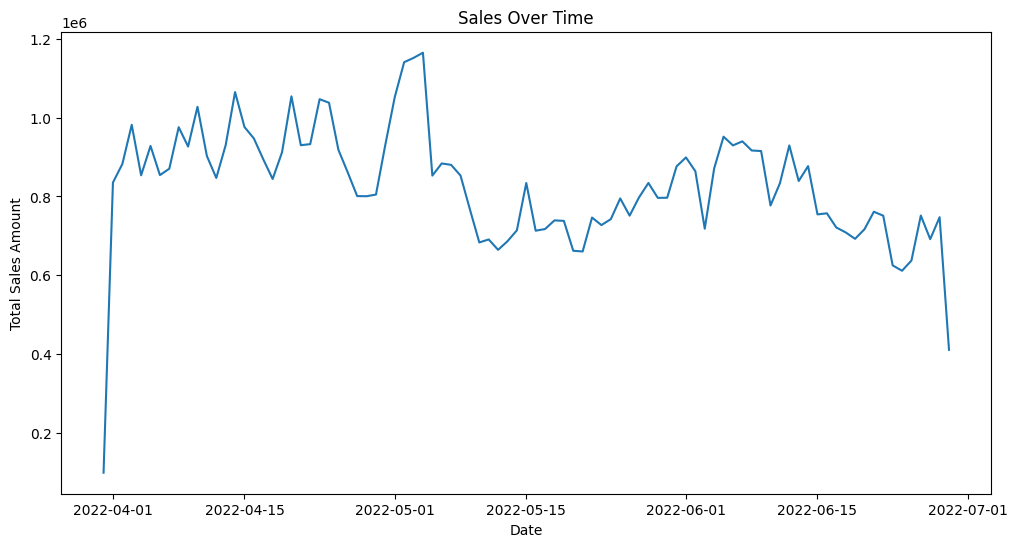

In [138]:
# Sales over time
sales_time_series = sales.groupby('Date')['Amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(sales_time_series['Date'], sales_time_series['Amount'])
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.show()

The first month was much better on average than the other months so far

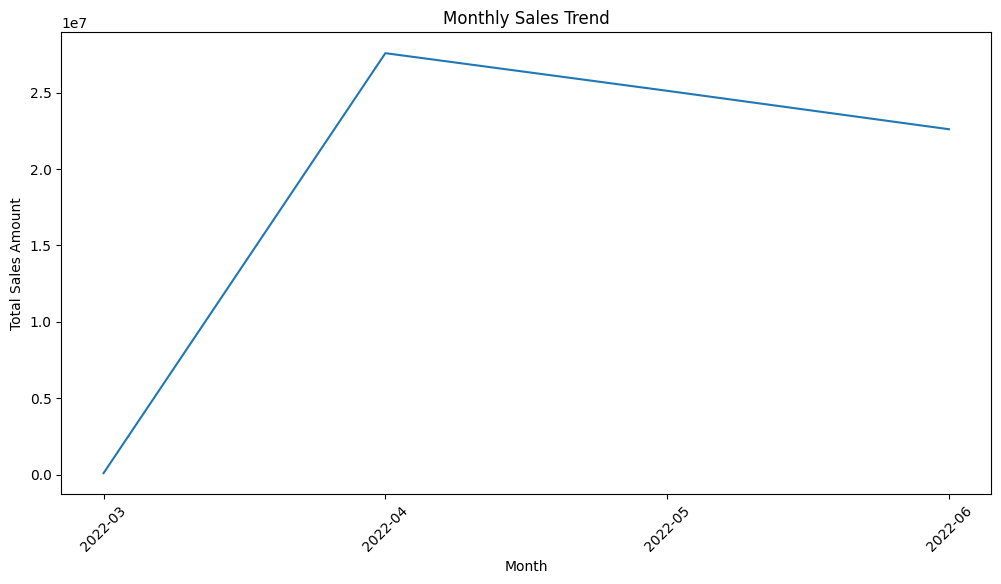

In [139]:
# Monthly sales trend
sales['Month'] = sales['Date'].dt.to_period('M')
monthly_sales = sales.groupby('Month')['Amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['Amount'])
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

### Categorical Analysis

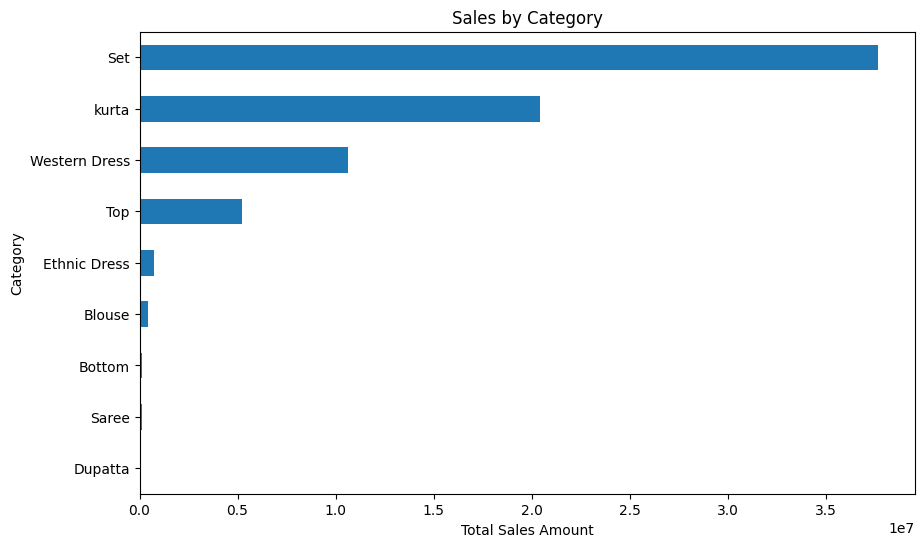

In [140]:
# Your plotting code
plt.figure(figsize=(10, 6))
sales.groupby('Category')['Amount'].sum().sort_values().plot(kind='barh')
plt.title('Sales by Category')
plt.xlabel('Total Sales Amount')
plt.ylabel('Category')
plt.show()

Majority of sales has been in:
- Set
- Kurta
- Western Dress
- Top

### Correlation Analysis

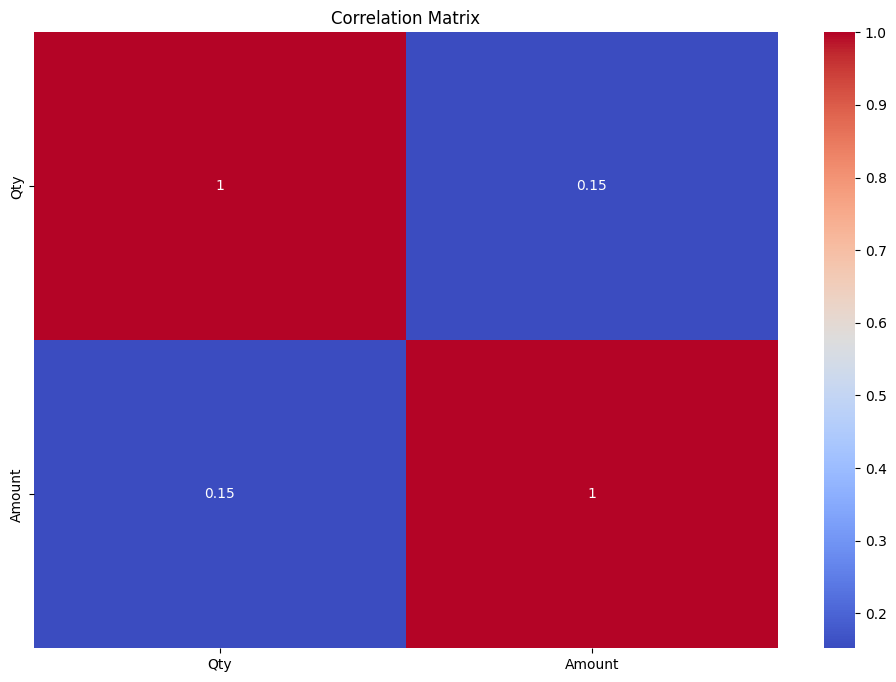

In [141]:
# Select only numerical columns
numerical_columns = sales.select_dtypes(include='number').columns[1:]

# Correlation matrix
correlation_matrix = sales[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Trend and Seasonal Patterns

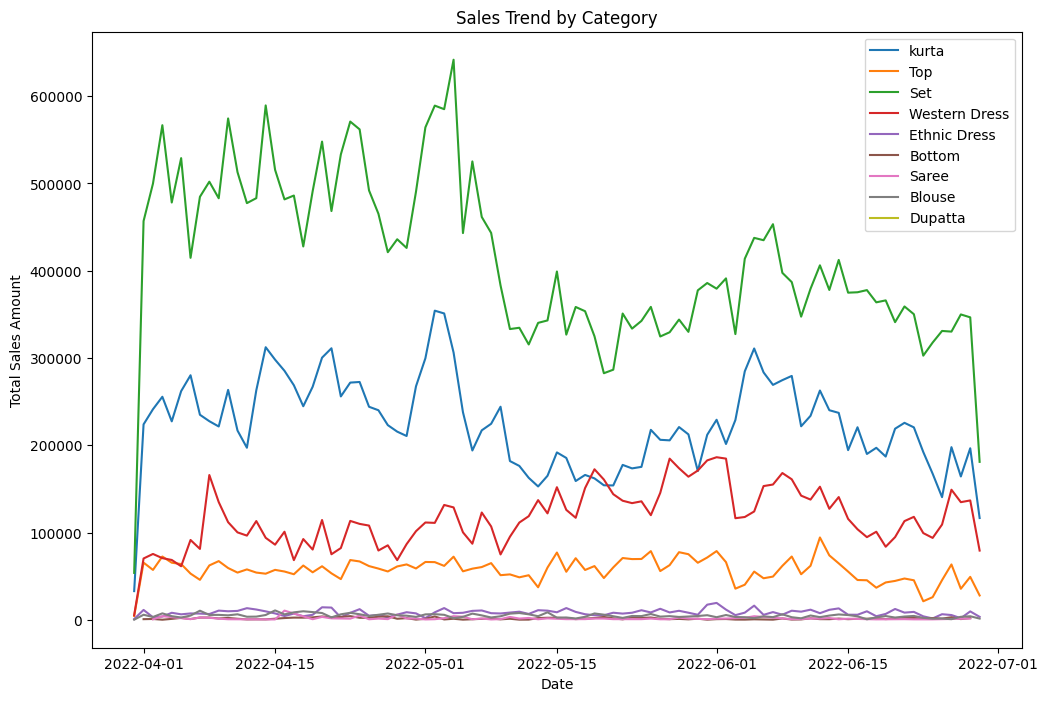

In [142]:
# Sales trend by category
plt.figure(figsize=(12, 8))
for category in sales['Category'].unique():
    category_sales = sales[sales['Category'] == category].groupby('Date')['Amount'].sum()
    plt.plot(category_sales.index, category_sales.values, label=category)

plt.title('Sales Trend by Category')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.legend()
plt.show()

Sales on Western Dresses picked up from Mid-May while Kurtas and Sets were bought less. The rest remained relatively constant.

### Visualizations

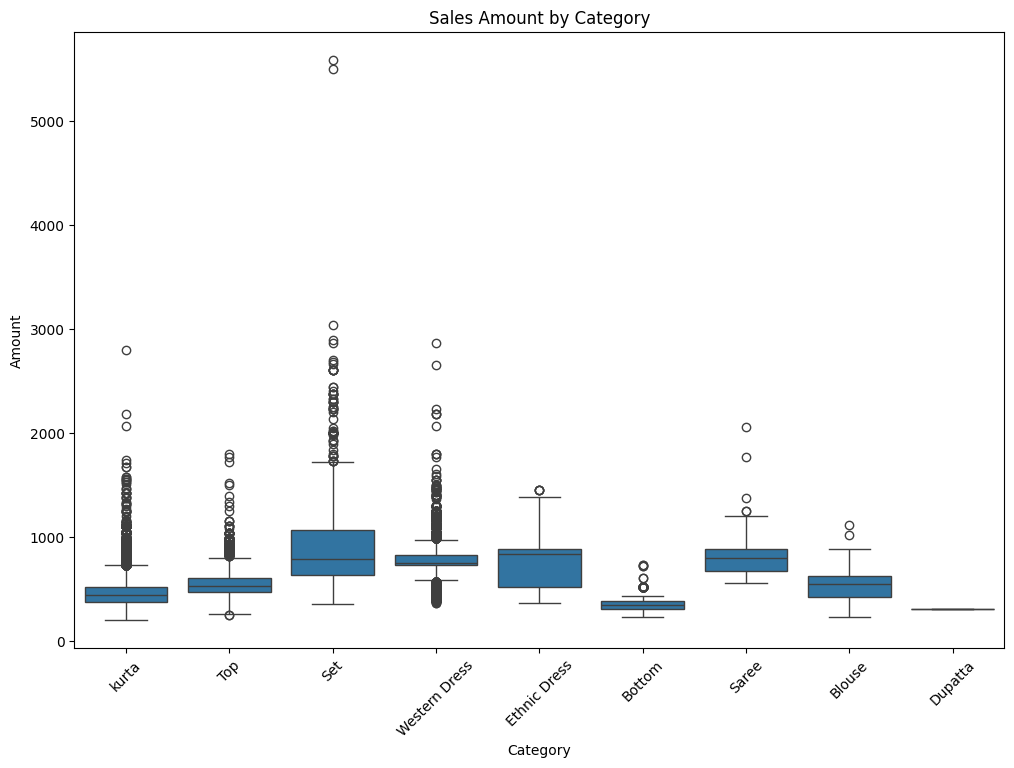

In [143]:
# Box plot of sales by category
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Amount', data=sales)
plt.title('Sales Amount by Category')
plt.xticks(rotation=45)
plt.show()

 The presence of outliers suggests that some items within specific categories might have exceptionally high or low sales compared to the norm.

## 6. Conclusion

The Retail Sales Analysis provided valuable insights into the sales performance across various dimensions such as time, product categories, and promotional activities. By cleaning and processing the data, we ensured that the analysis was based on accurate and reliable information. The exploratory data analysis revealed significant trends, including peak sales periods, which can be leveraged to optimize inventory management and sales strategies. The correlation analysis highlighted key relationships between variables, providing a deeper understanding of factors influencing sales. Overall, the findings from this project can guide data-driven decisions to enhance sales performance and operational efficiency in a retail environment.